# California Housing Linear_Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
housing = fetch_california_housing(as_frame=True)
data = housing.frame

In [3]:
data.rename(columns={"MedHouseVal": "PRICE"}, inplace=True)

In [4]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
print("Dataset Shape:", data.shape)
print("Dataset Overview:")
print(data.head())

Dataset Shape: (20640, 9)
Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


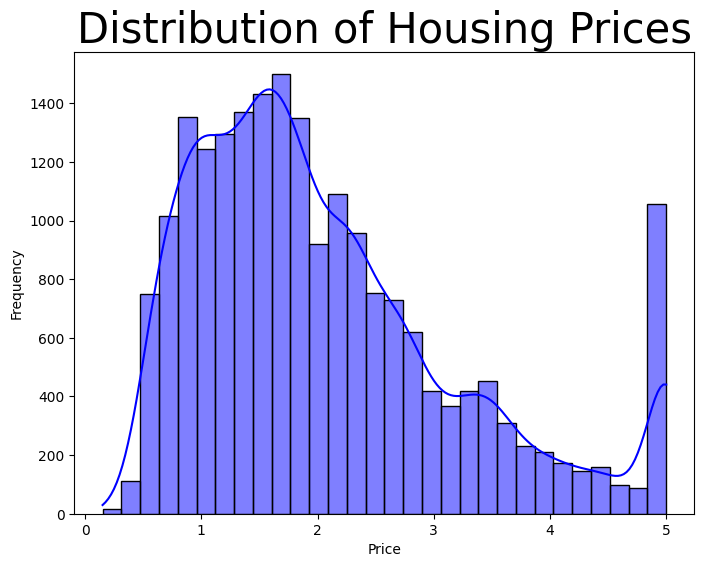

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(data['PRICE'], kde=True, bins=30, color='blue')
plt.title('Distribution of Housing Prices',fontsize=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

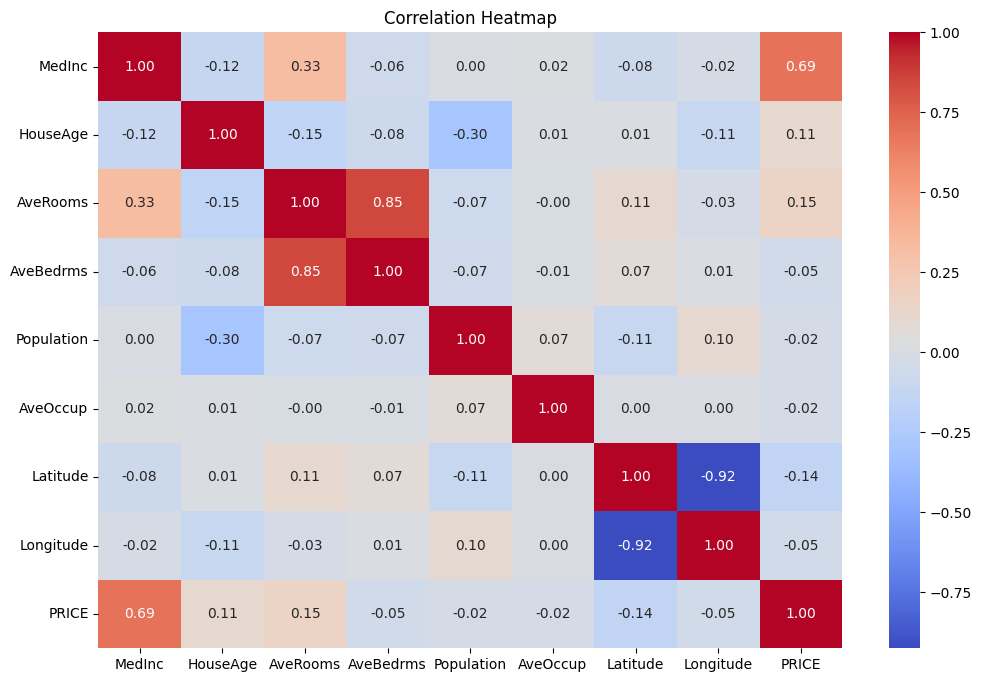

In [7]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
correlated_features = correlation_matrix['PRICE'].abs().sort_values(ascending=False)
selected_features = correlated_features[correlated_features > 0.5].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['PRICE', 'MedInc']


In [9]:
X = data[selected_features].drop('PRICE', axis=1)  # Features
y = data['PRICE']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [12]:
print("\nTraining Set Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"R² Score: {r2_score(y_train, y_train_pred):.2f}")

print("\nTesting Set Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_test_pred):.2f}")


Training Set Metrics:
Mean Squared Error: 0.70
Mean Absolute Error: 0.62
R² Score: 0.48

Testing Set Metrics:
Mean Squared Error: 0.71
Mean Absolute Error: 0.63
R² Score: 0.46


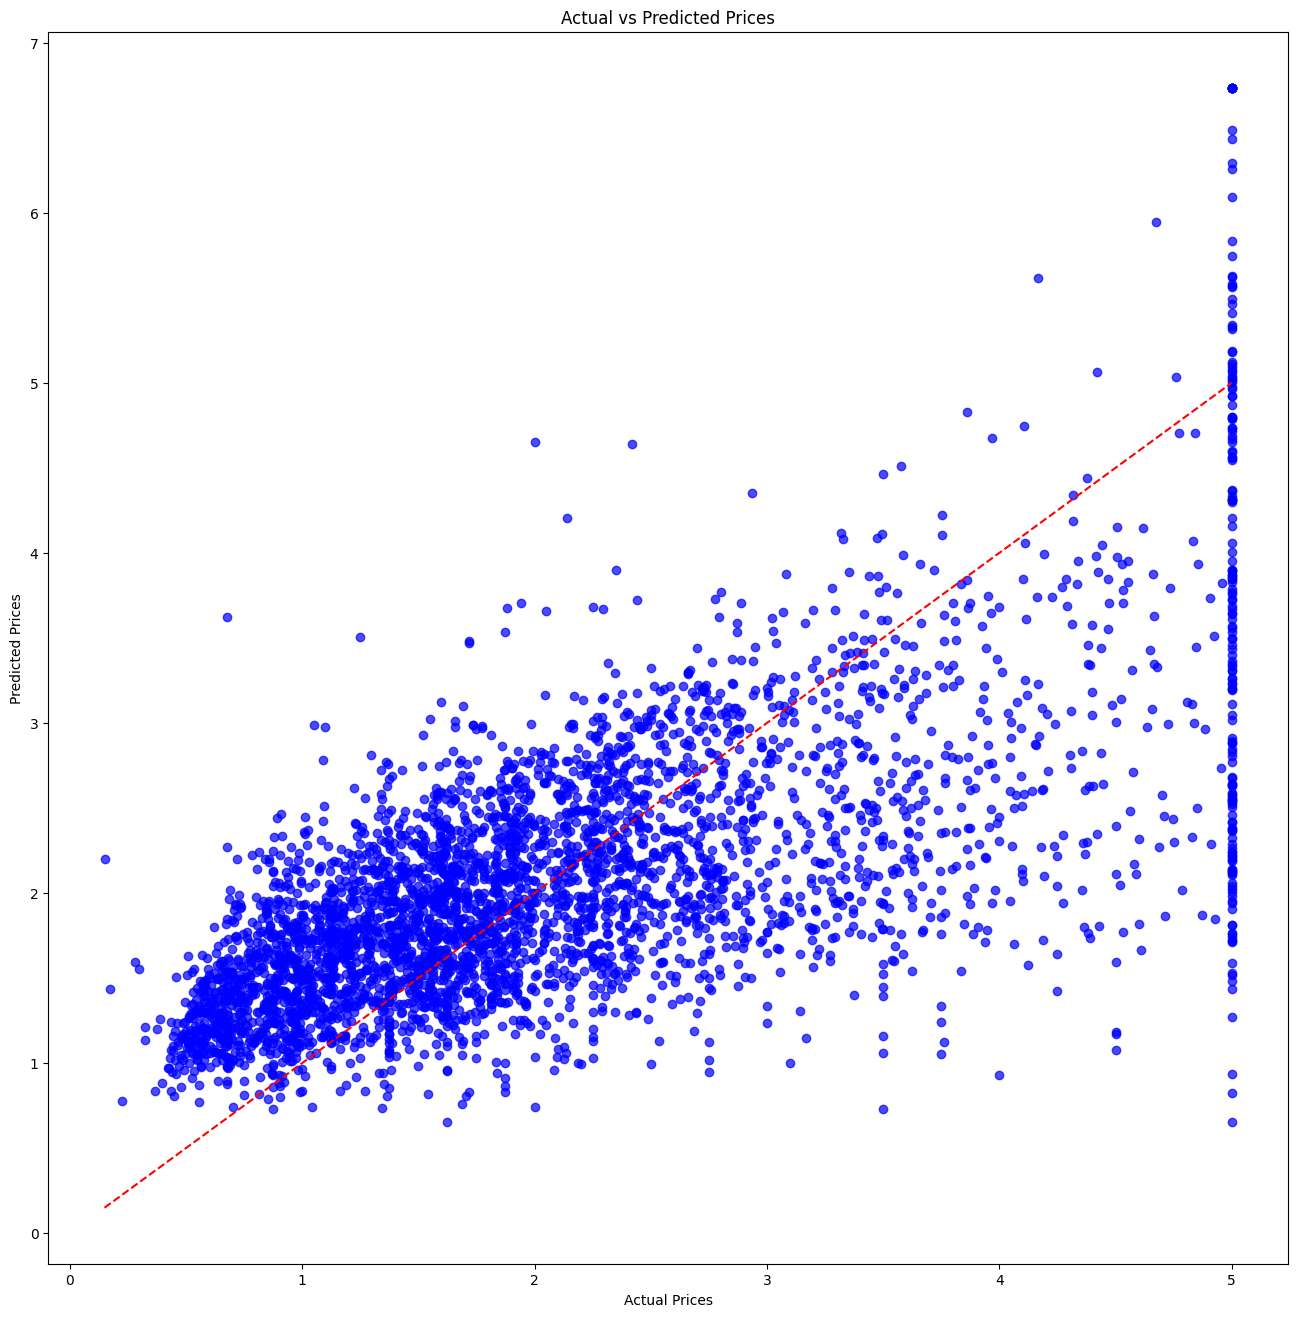

In [13]:
plt.figure(figsize=(16, 16))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

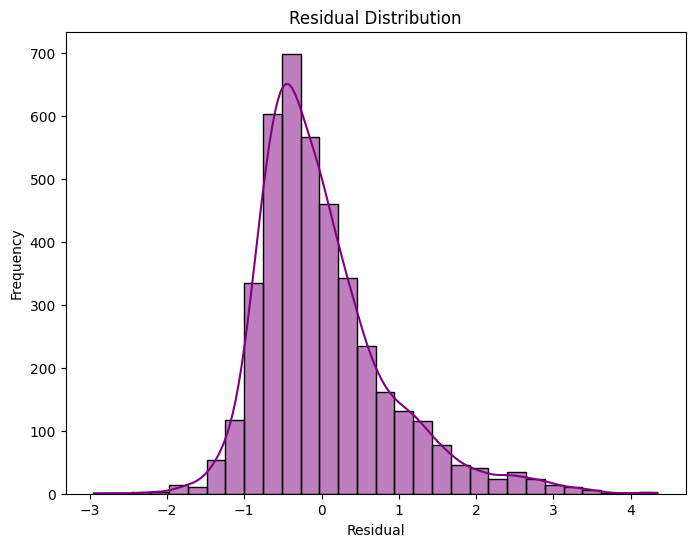

In [14]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title('Residual Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [15]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
        Coefficient
MedInc     0.419338


# Predict house prices for the test data

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R² Score: 0.45885918903846656
Mean Squared Error: 0.7091157771765548
Mean Absolute Error: 0.629908653009376


# RIDGE

In [18]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [19]:
x1 = data[selected_features].drop('PRICE', axis=1)
y1 = data['PRICE']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [21]:
ridge = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge.fit(x1_train, y1_train)
ridge_pred = ridge.predict(x1_test)
ridge_mse = mean_squared_error(y1_test, ridge_pred)

In [22]:
print("Ridge Coefficients:", ridge.coef_)
print("Ridge MSE:", ridge_mse)

Ridge Coefficients: [0.41933149]
Ridge MSE: 0.7091154228827911


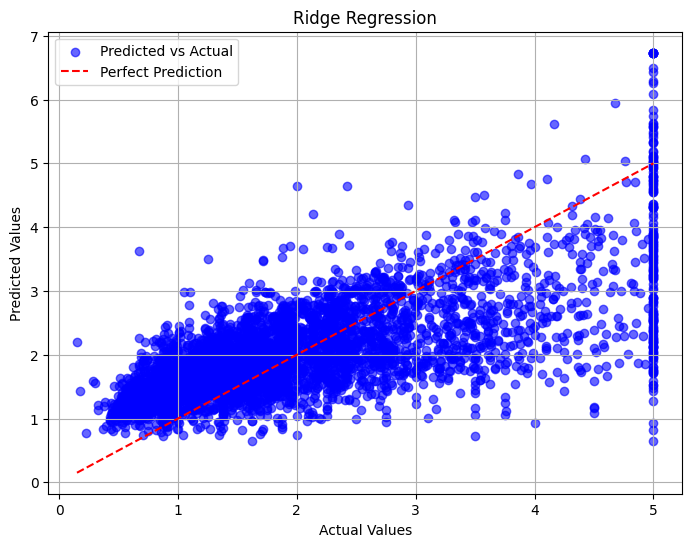

In [26]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.scatter(y1_test, ridge_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# LASSO

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(x1_train, y1_train)
lasso_pred = lasso.predict(x1_test)
lasso_mse = mean_squared_error(y1_test, lasso_pred)

print("Lasso Coefficients:", lasso.coef_)
print("Lasso MSE:", lasso_mse)

Lasso Coefficients: [0.39176078]
Lasso MSE: 0.7104136268779933


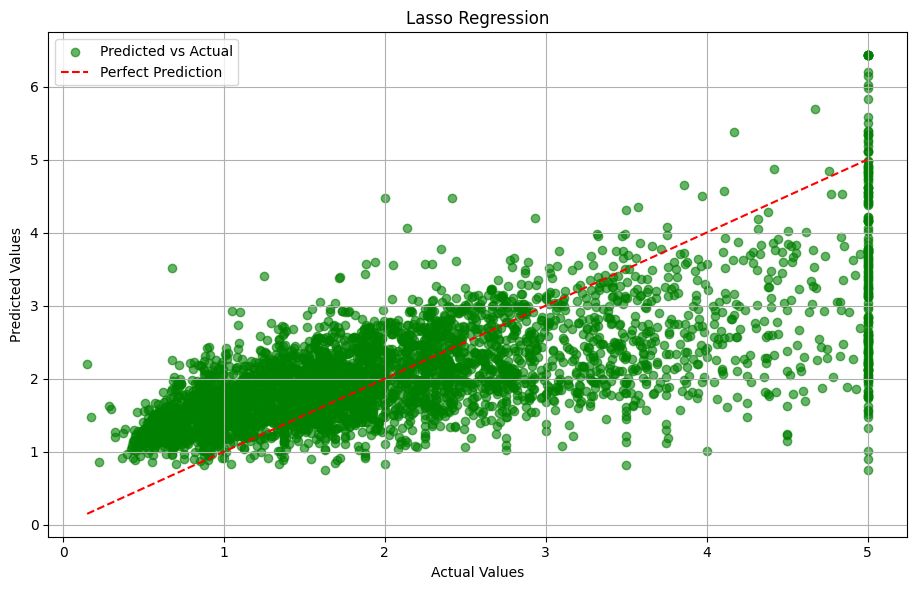

In [29]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
plt.scatter(y1_test, lasso_pred, color='green', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Comparision 

In [31]:
print("Comparison:")
print(f"Ridge MSE: {ridge_mse}")
print(f"Lasso MSE: {lasso_mse}")

Comparison:
Ridge MSE: 0.7091154228827911
Lasso MSE: 0.7104136268779933
